# Исследовательский анализ данных и проверка гипотез для сервиса Яндекс.Афиша

### Автор: Бойко Галина

### Цели и задачи
#### Цели
Ответить на вопросы продуктовой команды, а именно:
#### Задачи
* Загрузить данные и ознакомиться с ними
* Предобработать данные и подготовить их к исследованию
* Провести исследовательский анализ данных (выполнить анализ по сегментам, изучить осенную активность пользователей, отобрать популярные события и партнеров) 
* Выполнить статистический анализ (проверить 2 продуктовые гипотезы)
* Сделать общий вывод и дать рекомендации

### Структура проекта
* Загрузка данных и ознакомление
* Подготовка данных к дальнейшему анализу
* Исследовательский анализ
* Статистический анализ
* Общий вывод и рекомендации

## Загрузка данных и ознакомление

In [1]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [3]:
orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


### Промежуточный вывод
* Данные во всех трех датасетах не содержат явных пропусков, кроме столбца days_since_prev в order_df, их обрабатывать не нужно, пропуски обусловлены природой данных
* Столбец revenue в order_df нужно привести к единой валюте с помощью tenge_df, возможно придется сформировать новый столбец
* Столбцы user_id, days_since_prev нужно привести к типу int, created_dt_msk, created_ts_msk, data - к datetime64


## Предобработка данных и подготовка их к исследованию

На наличие явных пропусков датафреймы были проверены в предыдущем разделе

### Изучение данных в ключевых столбцах

In [9]:
# перед предобработкой проведем объединение 
df = orders_df.merge(events_df, how='inner', on='event_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

#### Для категориальных значений

In [10]:
# функция для проверки уникальных значений
def unique_values(x):
    return x.unique()

In [11]:
# проверка на скрытые пропуски
cols = ['cinema_circuit', 'age_limit','currency_code', 'device_type_canonical', 'event_type_main',  'organizers', 'region_name', 'city_name', 'venue_name']
for col in cols:
    print(f'{col}: {unique_values(df[col])}')

cinema_circuit: ['нет' 'Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм']
age_limit: [16  0 18 12  6]
currency_code: ['rub' 'kzt']
device_type_canonical: ['mobile' 'desktop']
event_type_main: ['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']
organizers: ['№3322' '№4850' '№1540' ... '№1161' '№3497' '№1904']
region_name: ['Каменевский регион' 'Североярская область' 'Озернинский край'
 'Лугоградская область' 'Поленовский край' 'Широковская область'
 'Медовская область' 'Златопольский округ' 'Малиновоярский округ'
 'Яблоневская область' 'Ветренский регион' 'Боровлянский край'
 'Крутоводская область' 'Ягодиновская область' 'Серебряноярский округ'
 'Лесодальний край' 'Верхоречная область' 'Горицветская область'
 'Речиновская область' 'Травиницкий округ' 'Сосновская область'
 'Серебринская область' 'Травяная область' 'Каменноярский край'
 'Солнечноземская область' 'Светополянский округ' 'Заречная область'
 'Ручейковский край' 'Глиногорская область' 'Тепляковская область'
 

Судя по проверке категориальных переменных неявных пропусков в столбцах нет

#### Для количественных значений

In [12]:
# Создание списка фильтрации
cols.extend(['order_id', 'event_id', 'city_id', 'venue_id'])

In [13]:
# Фильтрация количественных значений для операций в рублях
df[df['currency_code'] == 'rub'].drop(columns=cols, inplace=False).describe()

,revenue,tickets_count,total,days_since_prev
count,285542.000000,285542.000000,285542.000000,264497.000000
mean,548.013929,2.754159,6330.621221,3.209919
std,871.750181,1.171575,8619.327495,11.316096
min,-90.760000,1.000000,-358.850000,0.000000
25%,114.170000,2.000000,2120.070000,0.000000
50%,346.630000,3.000000,4673.850000,0.000000
75%,793.320000,4.000000,8783.220000,1.000000
max,81174.540000,57.000000,811745.400000,148.000000


In [14]:
# Фильтрация количественных значений для операций в тенге
df[df['currency_code'] == 'kzt'].drop(columns=cols, inplace=False).describe()

,revenue,tickets_count,total,days_since_prev
count,5069.000000,5069.000000,5069.000000,4201.000000
mean,4995.206767,2.762872,75236.969067,4.081171
std,4916.752776,1.115558,68039.218885,13.673274
min,0.000000,1.000000,0.000000,0.000000
25%,518.100000,2.000000,9353.700000,0.000000
50%,3698.830000,3.000000,61647.160000,0.000000
75%,7397.660000,4.000000,114868.830000,1.000000
max,26425.860000,6.000000,344606.500000,147.000000


Судя по статистическим показателям в данных присудствуют выбросы 
* Минимальное значение выручки в рублях меньше 0, возможно данные свидельтельствуют о возвратах
* Максимальное значение выручки  в рублях сильно больше чем 75 процентиль
* Максимальное значение выручки в тенге больше чем 75 процентиль
* Максимальное количество билетов для рублевых операций во много раз больше 75 процентиля

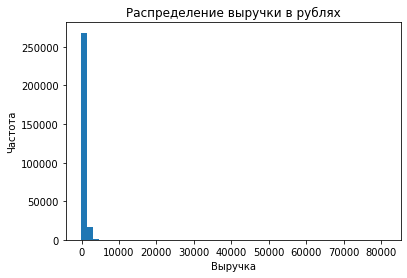

In [15]:
# Построение визуализации распределений выручки в рублях
df[df['currency_code'] == 'rub']['revenue'].plot(kind='hist', bins=50)
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

Визуализация подтверждает выводы, сделаннные по статистическим показателям

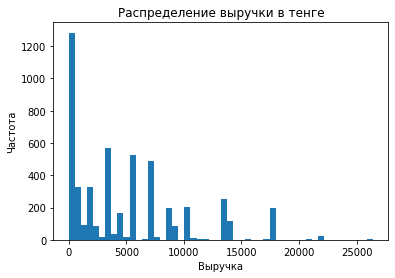

In [16]:
# Построение визуализации распределений выручки в тенге
df[df['currency_code'] == 'kzt']['revenue'].plot(kind='hist', bins=50)
plt.title('Распределение выручки в тенге')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.show()

Хотя распределение выручки в тенге более скачкообразное, чем в рублях, где все значения сосредоточены в одном месте, это не отменяет того, что выбросы присудствуют

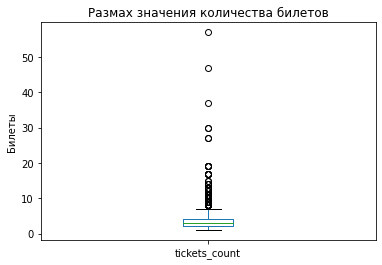

In [17]:
# Построение диаграммы размаха для количества билетов
df['tickets_count'].plot(kind='box')
plt.title('Размах значения количества билетов')
plt.ylabel('Билеты')
plt.show()

Диаграмма размаха подтвердила выводы, сделанные по статистическим показателям. В столбце tickets_count действительно имеются выбросы 

In [18]:
# Нахождение значений 99 процентиля для выручки в рублях и тенге
q99_rub = df[df['currency_code'] == 'rub']['revenue'].quantile(.99)
q99_kzt = df[df['currency_code'] == 'kzt']['revenue'].quantile(.99)

In [19]:
# Подсчет количества выбросов для рублевых операций
df[((df['currency_code'] == 'rub') & (df['revenue'] > q99_rub))]['revenue'].count()

2800

Количество выбросов для рублевых операций 2800, что составляет около 1% от всех данных, поэтому можно такие выбросы отфильтровать

In [20]:
# Подсчет количества выбросов для операций в тенге
df[((df['currency_code'] == 'kzt') & (df['revenue'] > q99_rub))]['revenue'].count()

2969

Количество выбросов для операций в тенге 2969, что составляет более 58% от всех операций в тенге, такие выбросы удалять нельзя, иначе потеряем большое количество данных казахских пользователей

In [21]:
# Отбор значений по 99 процентилю
df =  df[((df['currency_code'] == 'rub') & (df['revenue'] <= q99_rub)) | ((df['currency_code'] == 'kzt'))]

In [22]:
# Нахождение 99 проценитиля для количества билетов
q99 = df['tickets_count'].quantile(.99)

In [23]:
df[df['tickets_count'] > q99]['tickets_count'].count()

180

Количество выбросов для количества билетов 180, что составляет менее 1% от всех данных, поэтому такие выбросы можно отфильтровать

In [24]:
# Отбор выбросов
df = df[df['tickets_count'] <= q99]

In [25]:
# Проверка статистических показателей для операций в рублях
df[df['currency_code'] == 'rub'].drop(columns=cols, inplace=False).describe()

,revenue,tickets_count,total,days_since_prev
count,282562.000000,282562.000000,282562.000000,261722.000000
mean,510.561628,2.735127,6003.426681,3.206192
std,500.828305,1.136176,5113.085000,11.309738
min,-90.760000,1.000000,-358.850000,0.000000
25%,112.020000,2.000000,2101.252500,0.000000
50%,340.490000,3.000000,4595.120000,0.000000
75%,781.720000,3.000000,8632.430000,1.000000
max,2570.800000,6.000000,68049.590000,148.000000


In [26]:
# Проверка статистических показателей для операций в тенге
df[df['currency_code'] == 'kzt'].drop(columns=cols, inplace=False).describe()

,revenue,tickets_count,total,days_since_prev
count,5069.000000,5069.000000,5069.000000,4201.000000
mean,4995.206767,2.762872,75236.969067,4.081171
std,4916.752776,1.115558,68039.218885,13.673274
min,0.000000,1.000000,0.000000,0.000000
25%,518.100000,2.000000,9353.700000,0.000000
50%,3698.830000,3.000000,61647.160000,0.000000
75%,7397.660000,4.000000,114868.830000,1.000000
max,26425.860000,6.000000,344606.500000,147.000000


### Проверка на явные и неявные дубликаты

In [27]:
# Проверка на явные дубликаты
df.duplicated().sum()

0

Явных дублитакатов не наблюдается

In [28]:
# Проверка на неявные дубликаты (совпадает все кромен номера заказа)
df.drop(columns='order_id', inplace=False).duplicated().sum()

30

In [29]:
# Просмотр обнаруженных дубликатов
df[df.drop(columns='order_id', inplace=False).duplicated(keep=False) == True].head(6)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
3838,7299649,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
3839,7299678,a0384c26d91e09e,2024-08-24,2024-08-24 00:07:14,534657,нет,16,rub,mobile,679.21,...,dff567b7-11a5-4c4c-b223-70c8ab7efd15,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50"
8912,1585808,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.00,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,Каменевский регион,Глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
8915,7927528,c7a762e320f0def,2024-06-19,2024-06-19 11:07:59,538926,нет,18,rub,mobile,0.00,...,7b378eca-5d03-4f42-9491-a32887424226,событие,другое,№4549,Каменевский регион,Глиногорск,213,3474,"Креативное пространство ""Вдох"" Лимитед","бул. Пригородный, д. 7/1"
48970,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
48973,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2,2795,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"


Неявных дубликатов обнаружено 30. По видимому произошло задвоение заказов: у двух заказов разные номера, но в остальном они совпадают. Такие заказы будут мешать дальнейшему анализу, их количество не большое по сравнению с объемом датасета, поэтому я удалю их

In [30]:
# Удаление дубликатов
df = df[~(df.drop(columns='order_id', inplace=False).duplicated() == True)]

# Проверка удаления
df.drop(columns='order_id', inplace=False).duplicated().sum()

0

### Преобразование типов

In [31]:
# Преобразование к типу datetime для столбцов с датой и временем
cols = ['created_dt_msk', 'created_ts_msk']
for col in cols:
    df[col] = pd.to_datetime(df[col])

In [32]:
# Снижение размерности для количественных данных
cols = ['tickets_count', 'age_limit']
for col in cols:
    df[col] = pd.to_numeric(df[col], downcast='integer')

In [33]:
# Проверка преобразования типов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287601 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287601 non-null  int64         
 1   user_id                 287601 non-null  object        
 2   created_dt_msk          287601 non-null  datetime64[ns]
 3   created_ts_msk          287601 non-null  datetime64[ns]
 4   event_id                287601 non-null  int64         
 5   cinema_circuit          287601 non-null  object        
 6   age_limit               287601 non-null  int8          
 7   currency_code           287601 non-null  object        
 8   device_type_canonical   287601 non-null  object        
 9   revenue                 287601 non-null  float64       
 10  service_name            287601 non-null  object        
 11  tickets_count           287601 non-null  int8          
 12  total                   287601

### Создание новых столбцов

In [34]:
# Преобразование к типу datetime для столбца data, по которому буду объединять датафреймы
tenge_df['data'] = pd.to_datetime(tenge_df['data'])

In [35]:
# Объединение датафреймов
df = df.merge(tenge_df, how='inner', left_on='created_dt_msk', right_on='data')

In [36]:
# Функция для перевода тенге в рубли
def count_rub(x):
    if x['currency_code'] == 'rub':
        return x['revenue']
    else:
        return x['revenue'] / x['nominal'] * x['curs']

In [37]:
# Создание столбца выручки в рублях 
df['revenue_rub'] = df.apply(count_rub, axis=1)

In [38]:
# Удаление уже не нужных столбцов
df.drop(columns=['data', 'nominal', 'curs', 'cdx'], inplace=True)
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.73,...,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",144.73
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.27,...,шоу,стендап,№1124,Североярская область,Озёрск,2,1631,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",318.27
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.61,...,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",339.61
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.61,...,концерт,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",339.61


In [39]:
# Создание столбца с выручкой с продажи одного билета
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94,380.485
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.73,...,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",144.73,144.730
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.27,...,стендап,№1124,Североярская область,Озёрск,2,1631,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",318.27,106.090
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.61,...,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",339.61,339.610
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.61,...,концерты,№1134,Ветренский регион,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",339.61,339.610


In [40]:
# Создание столбца с месяцем операции
df['month'] = df['created_dt_msk'].dt.month
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
287596    6
287597    6
287598    6
287599    6
287600    6
Name: month, Length: 287601, dtype: int64

In [41]:
# Функция для разделения на времена года
def extract_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

In [42]:
# Создание столбца времен года
df['season'] = df['month'].apply(extract_season)
df['season']

0         лето
1         лето
2         лето
3         лето
4         лето
          ... 
287596    лето
287597    лето
287598    лето
287599    лето
287600    лето
Name: season, Length: 287601, dtype: object

### Промежуточный вывод
* Предобработка была проведена в полной мере
* Явных и неявных пропусков в столбцах практичеки нет
* На этапе проверки выбросов удалено 2980 строк, около 1% данных
* На этапе проверки дубликатов было найдено и удалено 30 дубликатов
* Добавлены новые столбцы revenue_rub, one_ticket_revenue_rub, month, season

## Исследовательский анализ данных
### Анализ распределения заказов по сегментам и их сезонные изменения
#### Количество заказов для каждого месяца

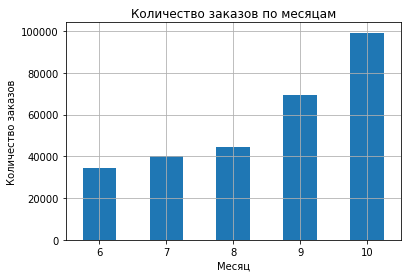

In [44]:
# Группировка заказов по месяцам
grouped = df.groupby('month')['order_id'].count()

# Визуализация количества заказов для каждого месяца
grouped.plot(
    kind='bar',
    rot=0
)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

На визуализации наглядно представлен рост количества заказов к ноябрю 2024 года

#### Сравнение распределения заказов для осеннего и летнего периода по разным категориям

In [45]:
# Выделение периодов
autumn = df[df['season'] == 'осень']
summer = df[df['season'] == 'лето']

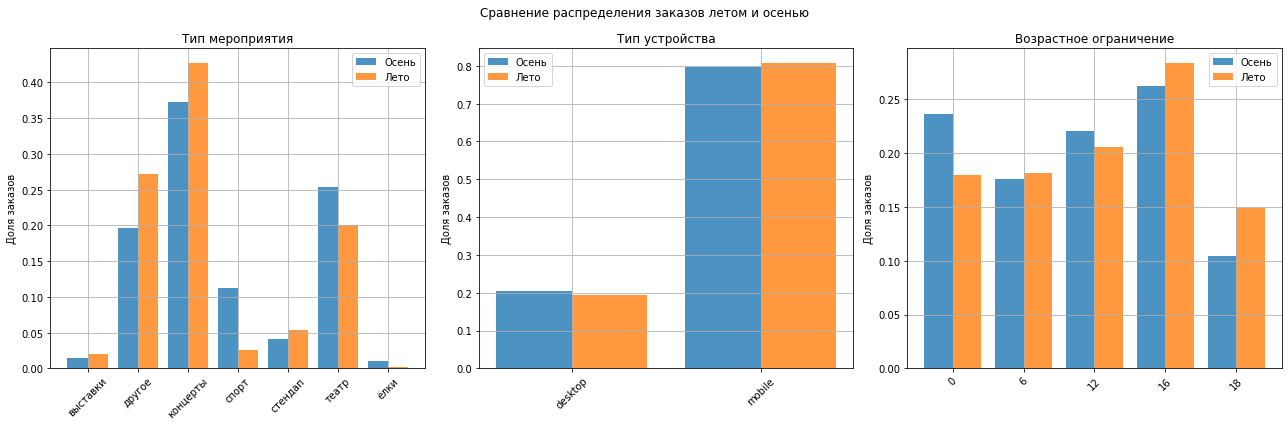

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных
categories = {
    'event_type_main': 'Тип мероприятия',
    'device_type_canonical': 'Тип устройства', 
    'age_limit': 'Возрастное ограничение'
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Сравнение распределения заказов летом и осенью')

for ax, (col, title) in zip(axes, categories.items()):
    # Получаем данные для обоих периодов
    autumn_data = autumn[col].value_counts(normalize=True)
    summer_data = summer[col].value_counts(normalize=True)
    
    # Объединяем все возможные категории
    all_categories = sorted(set(autumn_data.index) | set(summer_data.index))
    
    # Позиции для столбцов
    x = np.arange(len(all_categories))
    width = 0.4
    
    # Рисуем столбцы
    ax.bar(x - width/2, [autumn_data.get(cat, 0) for cat in all_categories], 
           width, label='Осень', alpha=0.8)
    ax.bar(x + width/2, [summer_data.get(cat, 0) for cat in all_categories], 
           width, label='Лето', alpha=0.8)
    
    # Настройки графика
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(all_categories, rotation=45)
    ax.set_ylabel('Доля заказов')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

По типам мероприятий:
* Распределение количества заказов летом и осенью отличается, так категории другое, театр, стендап и спорт находятся на 2, 3, 4, 5 местах по популярности летом, осенью же эти категории занимают 3, 2, 5, 4 места соотвественно 
  
По типам устройств:
* Видны небольшие различия в распределении: доля заказов со стационарных устройств больше осенью, но доля заказов с мобильных устройст больше летом 
  
По возрастному ограничению:
* Так же есть различия в распределении: доля заказов с ограничением 0+ осень много больше чем летом, доля заказов с ограничением 18+ больше летом, чем осенью

#### Изучение изменения выручки с продажи одного билета

In [47]:
av_autumn = autumn.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
av_summer = summer.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

In [48]:
pers = (av_autumn - av_summer) / av_summer * 100
pers

event_type_main
выставки     4.845634
другое      -1.721268
концерты   -12.040032
спорт       -1.493869
стендап      5.769255
театр      -17.833395
ёлки       -15.426081
Name: one_ticket_revenue_rub, dtype: float64

In [54]:
colors = ['green' if per > 0 else 'red' for per in pers]

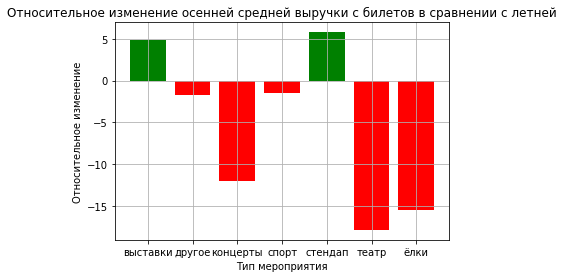

In [56]:
plt.bar(
    pers.index,
    pers.values, 
    color=colors
)
plt.title('Относительное изменение осенней средней выручки с билетов в сравнении с летней')
plt.xlabel('Тип мероприятия')
plt.ylabel('Относительное изменение')
plt.grid()
plt.show()

По данным визуализации понятно, что осенью выручка с одного билета повышается в категориях выставки и стендап

#### Промежуточный вывод
* Предположение, что количество заказов увеличивается к ноябрю, подтвердилось
* Осенью большая доля заказов находится в категориях: концерты, театр, другое; летом в тех же категориях, но распределены по другому: концерты, другое театр. Самые непопулярные категории меропрятий и летом, и осенью - выставки и елки
* Осенью и летом доля заказов по разным типам устройств распределены примерно одинково, с небольшими различиями: и там, и там лидирующую позицию занимают заказы с мобильных устройств, но осенью доля чуть меньше, чем летом
* Осенью большая доля заказов находится в возрастных ограничениях: 16, 0, 12. Летом: 16, 12, 6
* Отрицательное относительное изменение средней стоимости билета наблюдалосьв категориях театр, елки, концерты, другое, спорт. Что приводит к выводу, что средняя стоимость билетов летом на эти категории больше

### Осенняя активность пользователей
#### Анализ динамики изменений по дням

In [57]:
# Создание отдельного датафрейма для сводной таблицы
dinamic = pd.DataFrame()

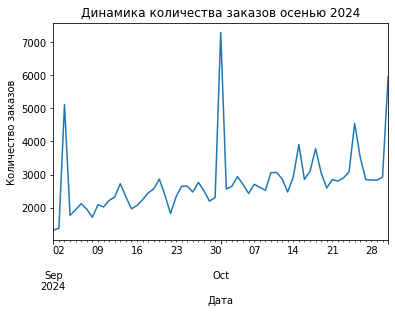

In [58]:
# Создание столбца общего числа пользователей по дням
dinamic['order_cnt'] = autumn.groupby('created_dt_msk')['order_id'].count()

# Визуализация
dinamic['order_cnt'].plot()
plt.title('Динамика количества заказов осенью 2024')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Динамика скачкообразная, имеющая тенденцию к увеличению, пики наблюдались 3 сентября, 1 октября и 31 октября

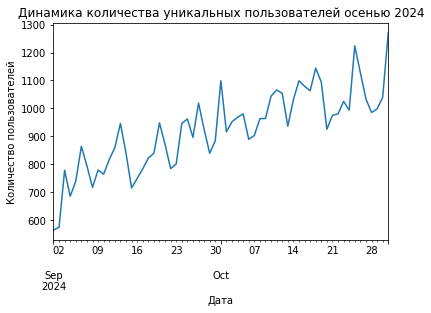

In [59]:
# Создание столбца dau по датам
dinamic['dau'] = autumn.groupby('created_dt_msk')['user_id'].nunique()

# Визуализация
dinamic['dau'].plot()
plt.title('Динамика количества уникальных пользователей осенью 2024')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.show()

Динамика количества активных пользователей скачкообразная, имеющая тенденцию к увеличению

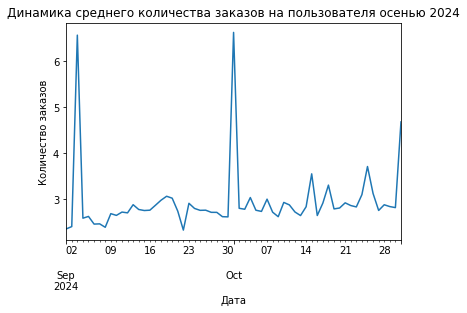

In [60]:
# Создание столбца среднего числа заказов на одного пользователя по датам
dinamic['avg_orders_per_user'] = dinamic['order_cnt'] / dinamic['dau'] 

# Визуализация
dinamic['avg_orders_per_user'].plot()
plt.title('Динамика среднего количества заказов на пользователя осенью 2024')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Динамика скачкообразная, пики, как и в динамике общего количества заказов, наблюдались 3 сентября, 1 октября и 31 октября

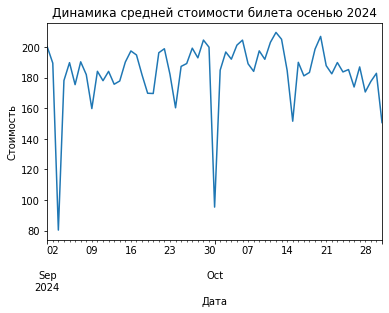

In [61]:
# Создание столбца средней стоимости одного билета по датам
dinamic['avg_ticket_cost'] = autumn.groupby('created_dt_msk')['one_ticket_revenue_rub'].mean()

# Визуализация
dinamic['avg_ticket_cost'].plot()
plt.title('Динамика средней стоимости билета осенью 2024')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()

Динамика скачкообразная, падения наблюдались 3 сентября, 1 октября и 31 октября

Судя по рассмотренным графикам 4 метрик, можно сделать вывод, что возможно 03 сентября, 1 и 31 октября, продавались билеты на какие-то очень массовые мероприятия. Средняя стоимость билетов в эти дни сильно падала, возможно из-за большого количества заказов или низкой цены билета, что может объяснить резкий скачок роста заказов

#### Изучение недельной цикличности

In [62]:
# Дата была индексом в сводной таблице, но чтобы извлечь из даты дни недели нужно сделать ее обычным столбцом
dinamic = dinamic.reset_index()

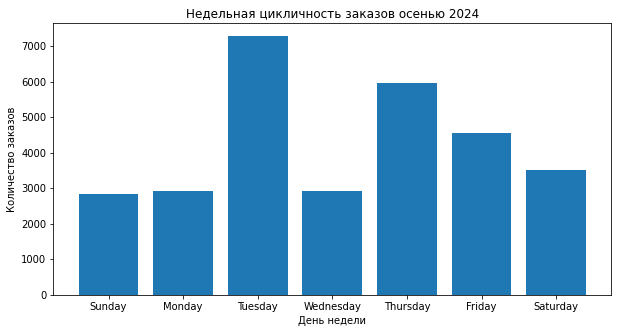

In [68]:
# Извлечение дня недели из даты
dinamic['day_of_week'] = dinamic['created_dt_msk'].dt.day_name()

# Построение визуализации
plt.figure(figsize=(10, 5))
plt.bar( 
    dinamic['day_of_week'], 
    dinamic['order_cnt'])
plt.title('Недельная цикличность заказов осенью 2024')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.show()

Как можно заметить, что наибольшее количество заказов во вторник, четверг и пятницу. Возможно именно в эти дни выкладываются билеты

#### Промежуточный вывод
* Все построенные графики отличались скачкообразностью
* Пики (общее количество заказов, среднее число заказов на пользователя) и падения средней стоимости билета выпадали на 3 сентября, 1 и 31 октября, возможно в это время происходило размещение билетов на какие-то большие и желаемые мероприятия
* Так же по недельной цикличности заметно, что рост количества заказов происходит во вторник и пятницу, возможно по этим дням выкладываются билеты

### Популярные события и партнёры
#### Для каждого региона

In [69]:
# Группируем заказы по регионам
grouped_regions = df.groupby('region_name')

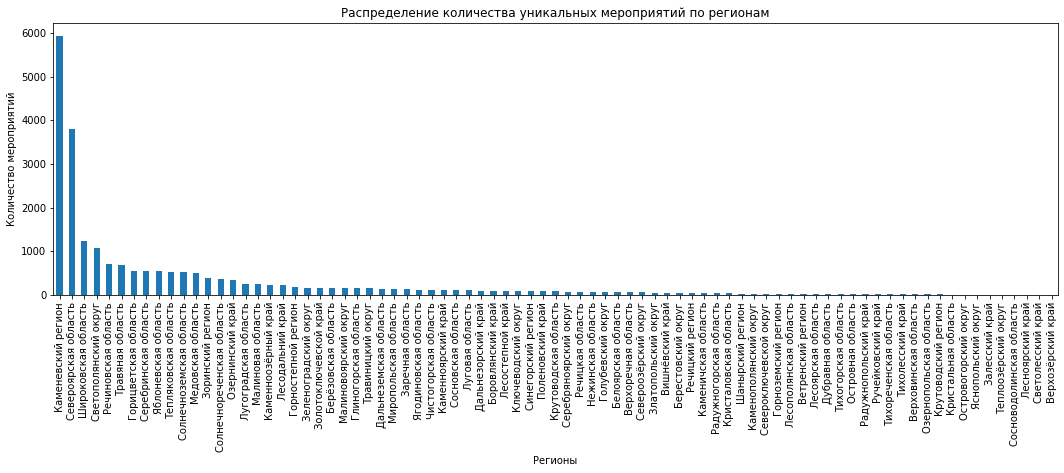

In [70]:
# Считаем количество уникальных мероприятий для каждого региона и визуализтруем
plt.figure(figsize=(18, 5))
grouped_regions['event_id'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества уникальных мероприятий по регионам')
plt.xlabel('Регионы')
plt.ylabel('Количество мероприятий')
plt.show()

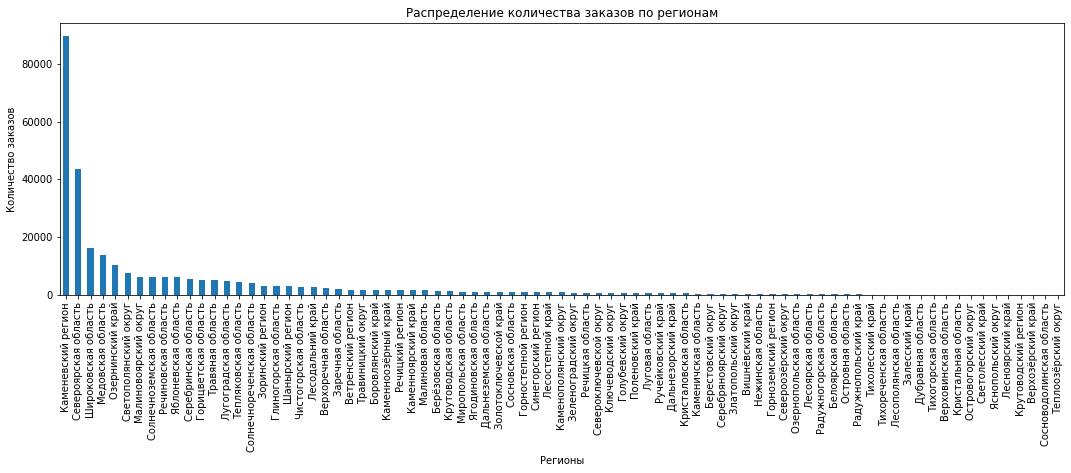

In [71]:
# Считаем количество заказов для каждого региона и визуализируем
plt.figure(figsize=(18, 5))
grouped_regions['order_id'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества заказов по регионам')
plt.xlabel('Регионы')
plt.ylabel('Количество заказов')
plt.show()

#### Для каждого патнера

In [72]:
# Группируем заказы по билетным партнерам
grouped_partners = df.groupby('service_name')

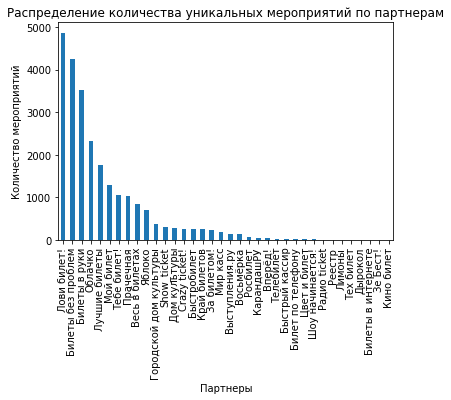

In [73]:
# Считаем количество уникальных мероприятий и визуализируем
grouped_partners['event_id'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества уникальных мероприятий по партнерам')
plt.xlabel('Партнеры')
plt.ylabel('Количество мероприятий')
plt.show()

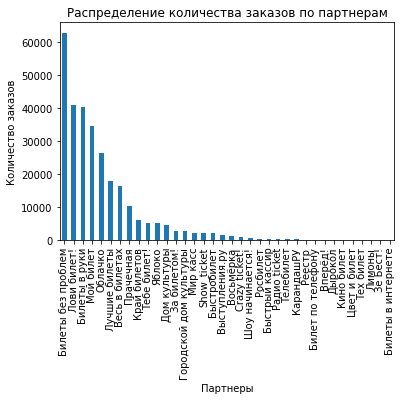

In [74]:
# Считаем количество заказов
grouped_partners['order_id'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества заказов по партнерам')
plt.xlabel('Партнеры')
plt.ylabel('Количество заказов')
plt.show()

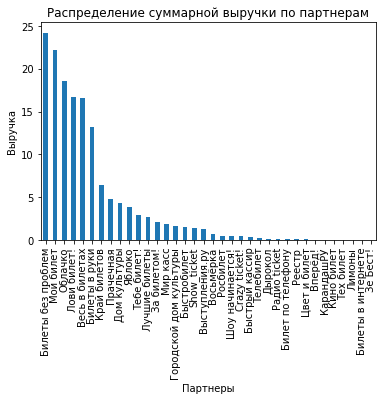

In [75]:
# Считаем суммарную выручку с заказанных билетов в млн рублей
(grouped_partners['revenue_rub'].sum().sort_values(ascending=False) / 10**6).plot(kind='bar')
plt.title('Распределение суммарной выручки по партнерам')
plt.xlabel('Партнеры')
plt.ylabel('Выручка')
plt.show()

#### Промежуточный вывод
По регионам:
* Топ-3 по количеству мероприятий и количеству заказов: Каменевский регион, Североярская и Широковская области
* Мероприятия этих трех регионов составляют около 50% от всех мероприятий
* Количество заказов для этих трех регионоа составляют 52%
* Явный лидер среди всех регионов Каменевский район судя по визуализации
  
По билетным парнетрам:
* Как видно по визуализациям распределение и количества мероприятий, и количества заказов, и суммарной выручки не равномерное
* В топ-3 по количеству мероприятий выходят Лови билет!, Билеты без проблем и Билеты в руки
* По количеству заказов топ-3: Билеты без проблем, Лови билетов!, Билеты в руки
* По суммарной выручке топ-3:  Билеты без проблем, Мой билет, Облачко
* Лидер - Билеты без проблем так как они продают одно из самых больших значений количества билетов, топ-1 и по количеству заказов и по суммарной выручке

## Статистический анализ данных

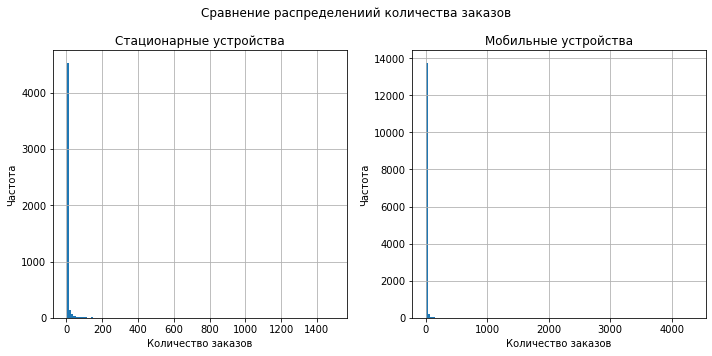

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

autumn[autumn['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count().plot(kind = 'hist', bins=120,  ax=axes[0])
axes[0].set_title('Стационарные устройства')
axes[0].set_xlabel('Количество заказов')
axes[0].set_ylabel('Частота')
axes[0].grid()

autumn[autumn['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count().plot(kind = 'hist', bins=120, ax=axes[1])
axes[1].set_title('Мобильные устройства')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Частота')
axes[1].grid()

plt.suptitle('Сравнение распределениий количества заказов')
plt.tight_layout()  
plt.show()

* Так как это гипотеза о среднем и размеры групп сильно не равны используем тест Уэлча для проверки гипотезы
* Уровень значимости примем 0.05 
  
Н0: Среднее количество заказов между пользователями мобильного приложения и пользователями стационарных устройств не отличается \
Н1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств

In [77]:
A = autumn[autumn['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()
B = autumn[autumn['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()

In [78]:
alpha = 0.05 # Задание уровня значимости

# Статистический тест Уэлча
stat_welch_ttest, p = ttest_ind(
    B, 
    A,
    equal_var=False,
    alternative='greater')

print(f'p-value = {p}')
if p > alpha:
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B не отличаются')
else:
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B отличаются, среднее количество заказов в группе модильных устройств больше ')

p-value = 0.0008044439824555602
Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B отличаются, среднее количество заказов в группе модильных устройств больше 


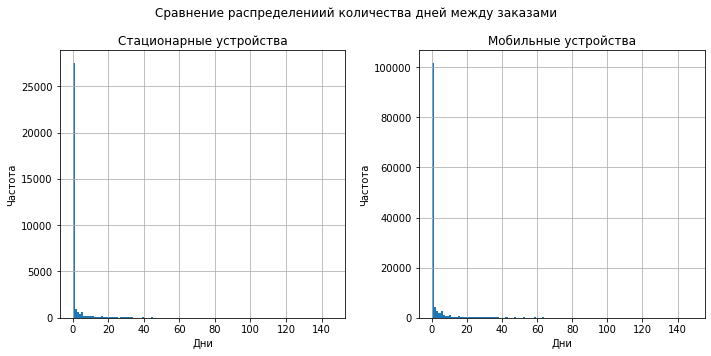

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Гистограмма для desktop
autumn[(autumn['device_type_canonical'] == 'desktop') & (autumn['days_since_prev'].isna() == False)]['days_since_prev'].hist(
    bins=120, ax=axes[0])
axes[0].set_title('Стационарные устройства')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Частота')

# Гистограмма для mobile
autumn[(autumn['device_type_canonical'] == 'mobile') & (autumn['days_since_prev'].isna() == False)]['days_since_prev'].hist(
    bins=120, ax=axes[1])
axes[1].set_title('Мобильные устройства')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Частота')

plt.suptitle('Сравнение распределениий количества дней между заказами')
plt.tight_layout()  
plt.show()

* Так как это гипотеза о среднем используем тест стьюдента для проверки гипотезы
* Уровень значимости примем 0.05 

Н0: Среднее время между заказами между пользователями мобильного приложения и пользователями стационарных устройств не отличается \
Н1: Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств

In [80]:
A = autumn[(autumn['device_type_canonical'] == 'desktop') & (autumn['days_since_prev'].isna() == False)]['days_since_prev']
B = autumn[(autumn['device_type_canonical'] == 'mobile') & (autumn['days_since_prev'].isna() == False)]['days_since_prev']

In [81]:
alpha = 0.05 # Задание уровня значимости

# Статистический тест Стьюдента
stat_ttest, p = ttest_ind(
    B, 
    A,
    alternative='greater')

print(f'p-value = {p}')
if p > alpha:
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B не отличаются')
else:
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B отличаются, среднее время между заказами в группе мобильных устройств больше ')

p-value = 1.2634353801380486e-20
Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B отличаются, среднее время между заказами в группе мобильных устройств больше 


## Общий вывод и рекомендации
### Результаты анализа
* Работа была произведена с данными из двух датасетов final_tickets_orders_df и final_tickets_events_df, содержащие 14столбцов и 290849 строк и 11 столбцов и 22427 строк соотвественно
* Датасеты были объеденены
* Перед анализом была произведена предобработка: данные проверены на явные и неявные пропуски и дубликаты, столбцы с датой приведены правильному типу данных, размерности некоторых столбцов была уменьшена, созданы дополнительные столбцы
* Наиболее востребованные категории осенью: концерты, театр, "другое". Наименее популярные: выставки и ёлки.
* Пики заказов приходятся на 3 сентября, 1 и 31 октября, вероятно, из-за анонсов крупных мероприятий.
* Рост активности наблюдается по вторникам и пятницам, что может быть связано с выходом новых билетов.
* Количество заказов увеличивается к ноябрю.
* Средняя стоимость билета осенью снизилась по сравнению с летом, особенно в категориях: театр, ёлки, концерты, "другое", спорт.
* Основная доля заказов приходится на мобильные устройства.
* Осенью преобладают заказы с возрастными ограничениями 16+, 0+, 12+; летом — 16+, 12+, 6+.
* Топ-3 по количеству мероприятий и заказов: Каменевский регион, Североярская и Широковская области (52% заказов). Каменевский регион — явный лидер.
* Лидеры по количеству мероприятий и заказов: "Билеты без проблем", "Лови билет!", "Билеты в руки". По выручке топ-3: "Билеты без проблем", "Мой билет", "Облачко". Абсолютный лидер — "Билеты без проблем" (максимальные показатели по заказам и выручке).
* Обе продуктовые гипотезы подтвердились. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств (p-value = 5.552536682038302e-23). Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств (p-value = 1.208466401675543e-20)
### Рекомендации
* Стоит четко определить природу резких скачков количества заказов и среднего количества заказов на пользователя 3 сентября и 1 октября, что проводить больше подобных акций в будущем
* Также стоит обратить внимание, что осень вырастает популярность мероприятий с возрастным ограничением 0 и 12+. возможно это связано с проведением экскурсий, совместных поездок в театр и на концерты для школьников
* Не